In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [13]:
cleaned_data = pd.read_csv('/Users/Yu/Documents/GitHub/Midterm_Project/data/cleaned_data.csv')

In [20]:
# Linear regression for Happiness Score Prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [15]:

data = cleaned_data

# Select features and target variable
features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]
target = "Happiness Score"

X = data[features]
y = data[target]


In [16]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.4972984723761798
R-squared: 0.5943148200094724


The MSE value of 0.497 is relatively low, indicating that the model's predictions are, on average, close to the actual happiness scores. However, the interpretation of MSE can be subjective based on the scale of your target variable.

The R-squared value of 0.594 means that about 59.4% of the variability in happiness scores is captured by the features in your model. This suggests a moderately good fit, indicating that the model is capturing a significant portion of the variability in happiness scores.

In [23]:
# Interpret the model coefficients
coef = model.coef_
intercept = model.intercept_
feature_names = features

for name, value in zip(feature_names, coef):
    print(f"{name}: {value}")

print(f"Intercept: {intercept}")


Economy (GDP per Capita): 0.7440494265697027
Family: 1.6531982637073293
Health (Life Expectancy): -0.09120183345308974
Freedom: 2.11237071611311
Trust (Government Corruption): -0.5927558951242824
Generosity: 0.884585628438216
Intercept: 1.9535117454161988


Explanation: 
Economy (GDP per Capita): 0.7440494265697027
For every one-unit increase in the GDP per Capita, the happiness score is expected to increase by approximately 0.744. This suggests that higher GDP per capita tends to be associated with higher happiness scores.

Family: 1.6531982637073293
For every one-unit increase in the Family variable, the happiness score is expected to increase by approximately 1.653. A strong sense of social support or family relationships appears to have a positive impact on happiness scores.

Health (Life Expectancy): -0.09120183345308974
Interestingly, for every one-unit increase in Life Expectancy, the happiness score is expected to decrease by approximately 0.091. This might seem counterintuitive, and further investigation might be needed. It's possible that other factors are affecting this relationship.

Freedom: 2.11237071611311
For every one-unit increase in Freedom, the happiness score is expected to increase by approximately 2.112. Higher levels of perceived freedom are associated with higher happiness scores.

Trust (Government Corruption): -0.5927558951242824
For every one-unit increase in the Trust variable (lower corruption), the happiness score is expected to decrease by approximately 0.593. This suggests that countries with higher levels of trust in their government might have slightly lower happiness scores.

Generosity: 0.884585628438216
For every one-unit increase in Generosity, the happiness score is expected to increase by approximately 0.885. Higher levels of generosity might contribute to higher happiness scores.

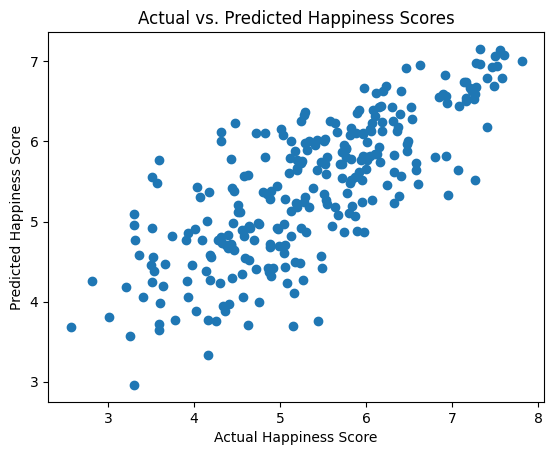

In [24]:
# Visualize the prediction

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs. Predicted Happiness Scores")
plt.show()

In [25]:
# Build a classification model to predict whether a country's happniess rank will be increase, decrease or remain the same in the next year
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]
target = "Happiness Rank"

X = data[features]
y = data['Happiness Rank'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.04395604395604396


In [34]:
canada_data = data.loc[data['Country'] == 'Canada']
canada_data_2023 = canada_data.loc[canada_data['Year'] == 2023]
canada_data_2023

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
1241,2023,Canada,13,6.961,10.773,0.929,71.4,0.874,0.42,0.153


In [35]:
canada_features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]

# Use the above model for prediction
predicted_classes = clf.predict(canada_data_2023[canada_features])

# Interpret the prediction
if predicted_class == 'increase':
    print("The model predicts Canada's rank will increase.")
elif predicted_class == 'decrease':
    print("The model predicts Canada's rank will decrease.")
else:
    print("The model predicts Canada's rank will remain the same.")


The model predicts Canada's rank will remain the same.


/opt/anaconda3/envs/the_one/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


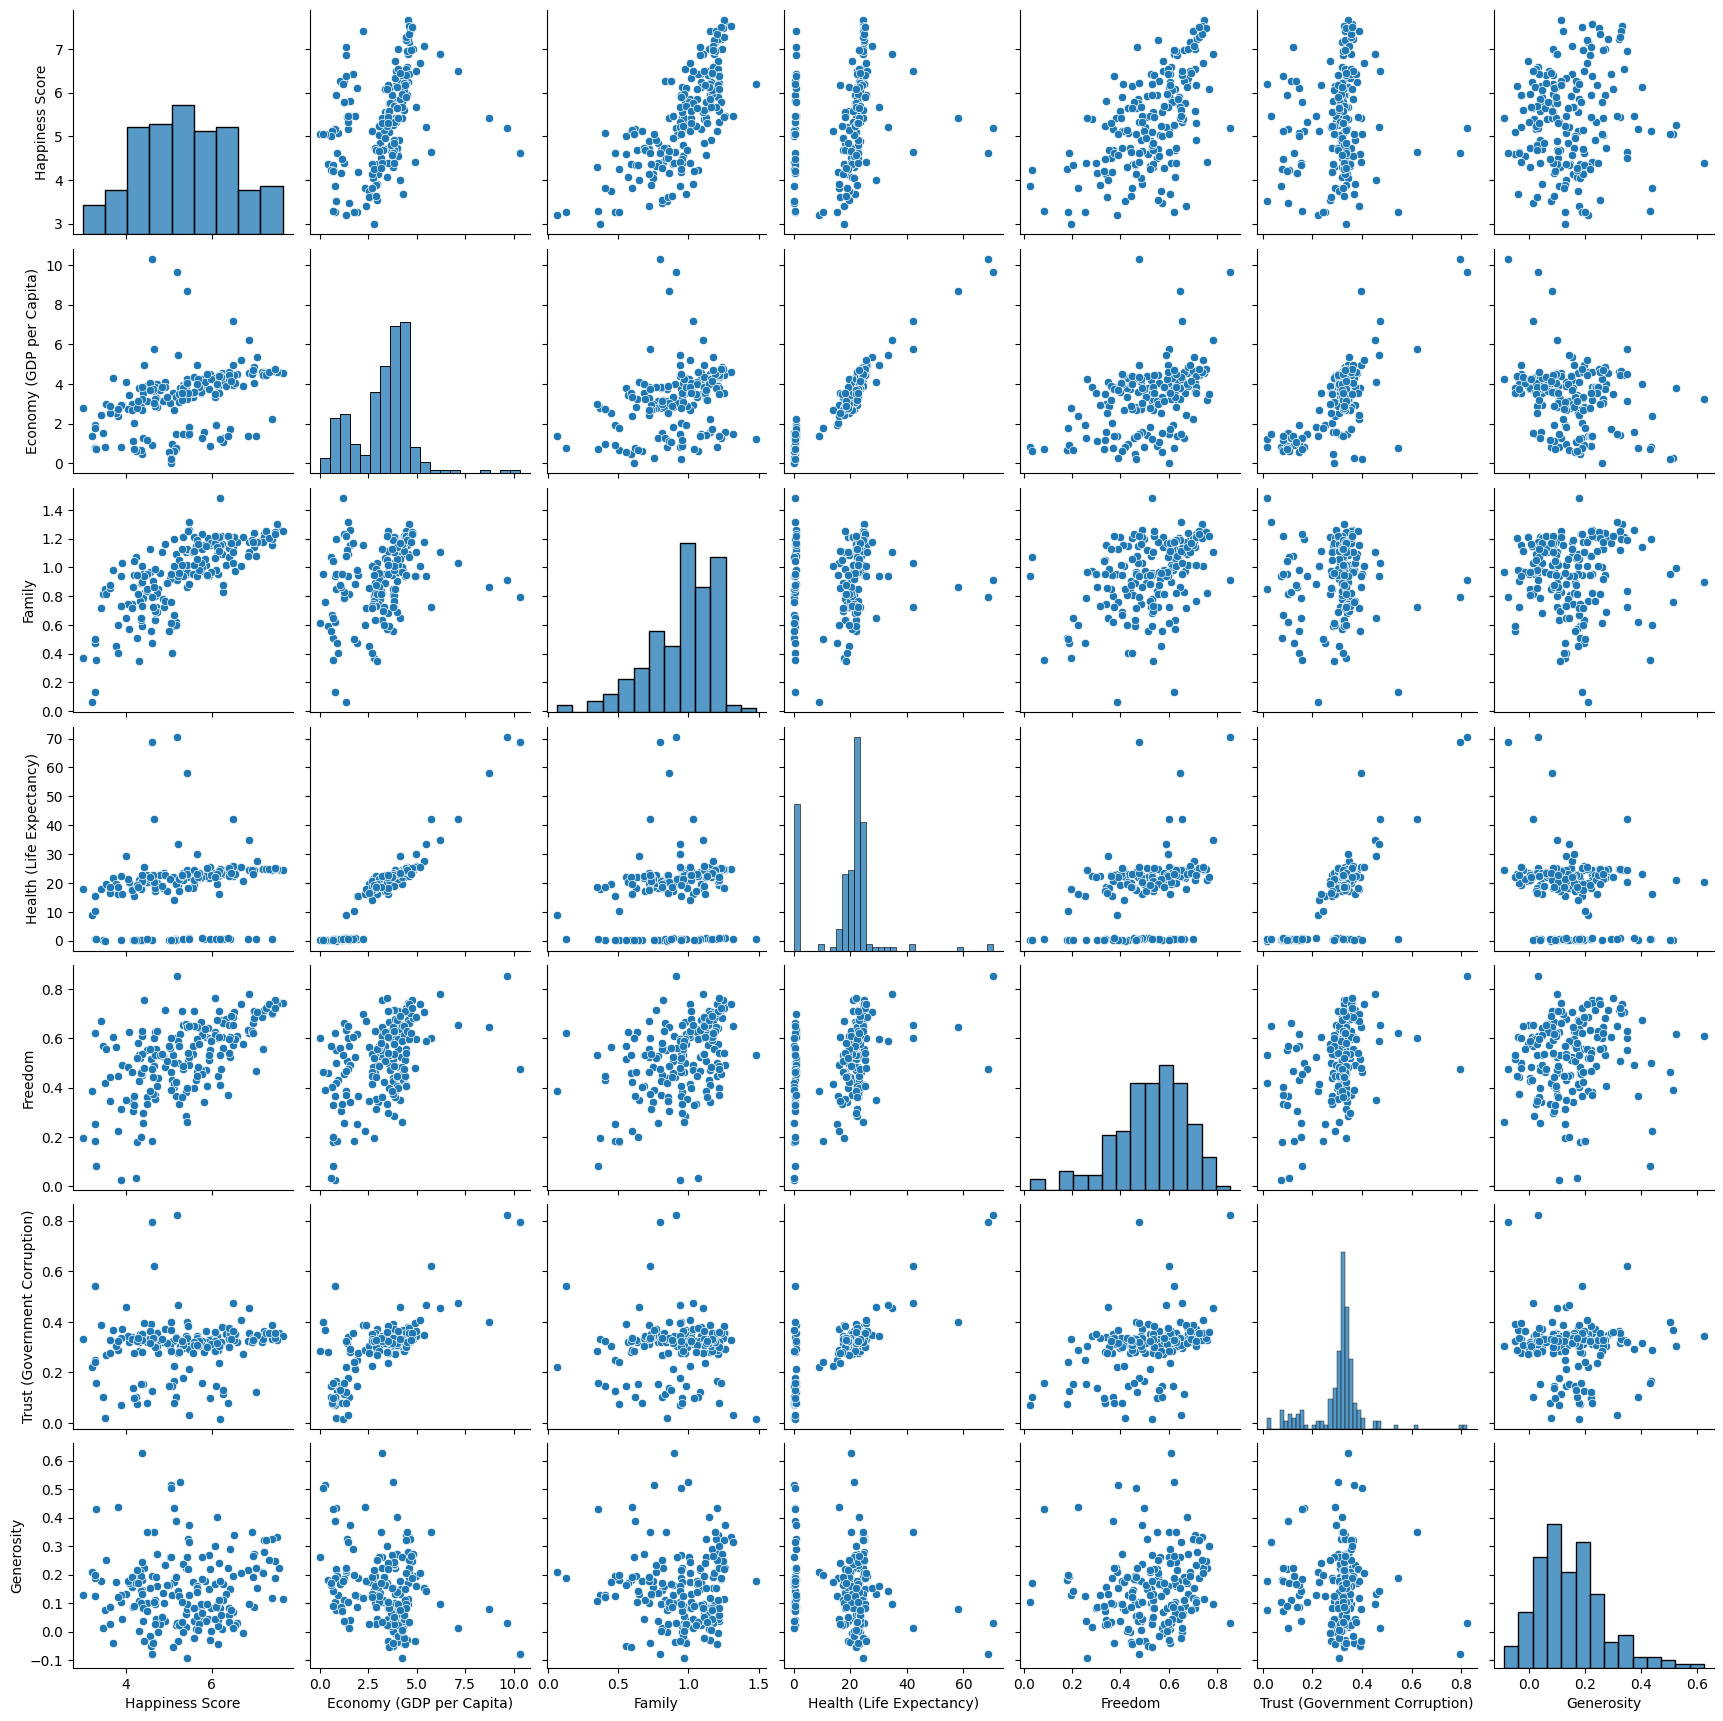

In [28]:
# Plot scatter matrix
data.loc[:,~data.columns.isin(["Happiness Rank","Year"])].groupby('Country').mean()
sns.pairplot(data.loc[:,~data.columns.isin(["Happiness Rank","Year"])].groupby('Country').mean())

By looking at the first row of the plot, we can see most of the predictors have a linear positive relation with the Happiness Score.
For Health and Government Corrution, maybe an exponential function could decribe the relations. For Generosity, it is not obvious to see the relationship.

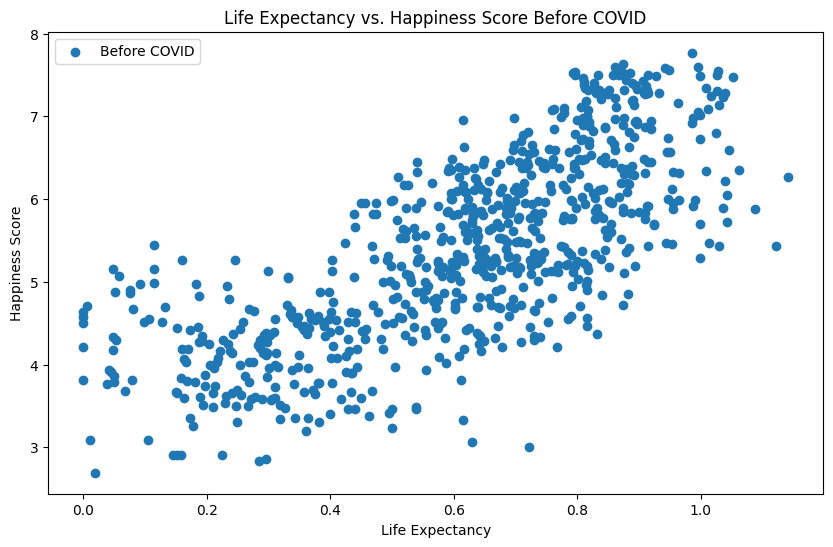

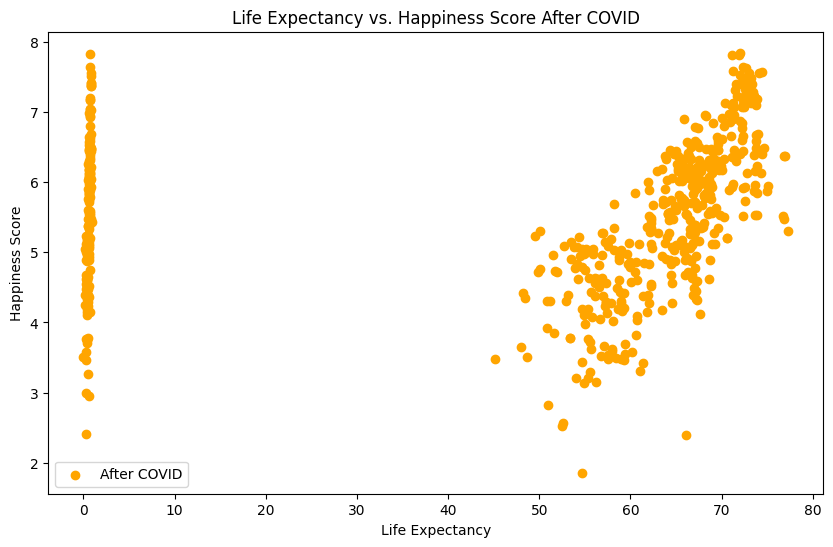

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for years before and after COVID-19
data_before_covid = data[data['Year'] < 2020]
data_after_covid = data[data['Year'] >= 2020]

# Scatter plot: Life Expectancy vs. Happiness Score (Before COVID)
plt.figure(figsize=(10, 6))
plt.scatter(data_before_covid['Health (Life Expectancy)'], data_before_covid['Happiness Score'], label='Before COVID')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Life Expectancy vs. Happiness Score Before COVID')
plt.legend()
plt.show()

# Scatter plot: Life Expectancy vs. Happiness Score (After COVID)
plt.figure(figsize=(10, 6))
plt.scatter(data_after_covid['Health (Life Expectancy)'], data_after_covid['Happiness Score'], label='After COVID', color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Life Expectancy vs. Happiness Score After COVID')
plt.legend()
plt.show()
